# AI- PROJECT

## DEEP LEARNING TO PREDICT UPCOMING COVID19 CASES AND DEATH TROLLS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
%matplotlib inline

In [2]:
confirmed_cases= pd.read_csv('./Dataset/time_series_covid19_confirmed_global.csv')

In [4]:
death= pd.read_csv('Dataset/time_series_covid19_deaths_global.csv')

In [7]:
recovered = pd.read_csv('Dataset/time_series_covid19_recovered_global.csv')

In [8]:
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,854,854,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,148,155,166,172,176,183,186,189,197,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,671,683,688,693,698,698,702,707,710,711
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,885,902,909,919,922,941,967,992,1015,1076
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,197,197,210,210,247,247,247,265,265,272
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,5160,5221,5279,5338,5399,5457,5513,5567,5630,5691


In [9]:
death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,491,504,546,548,569,581,598,618,639,675
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,37,38,39,42,43,44,44,45,47,49
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,788,799,811,825,837,845,852,861,869,878
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,6,7,8,8,9,9,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,13,13
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,214,244,248,251,254,256,257,261,274,288
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,3,3,5,5,5,5,5,7,7,7
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,50,51,51,51,52,52,52,52,52,52


In [10]:
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,7842,7943,8078,8196,8324,8422,8559,8674,8792,8920
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,789,791,792,792,792,792,796,797,797,797
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,64,64,64,66,66,77,77,77,77,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,182,188,191,199,203,203,203,208,211,214
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,91,271,273,288,328,347,350,356,379,386
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,127,127,129,129,159,159,159,159,159,161
251,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,3624,3700,3762,3830,3894,3995,4039,4109,4194,4267


In [11]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/16/20', '6/17/20', '6/18/20', '6/19/20', '6/20/20', '6/21/20',
       '6/22/20', '6/23/20', '6/24/20', '6/25/20'],
      dtype='object', length=160)

In [12]:
confirmed= confirmed_cases.loc[:,cols[4]:cols[-1]]

In [13]:
deaths = death.loc[:,cols[4]:cols[-1]]

In [14]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20
0,0,0,0,0,0,0,0,0,0,0,...,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175
1,0,0,0,0,0,0,0,0,0,0,...,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192
2,0,0,0,0,0,0,0,0,0,0,...,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445
3,0,0,0,0,0,0,0,0,0,0,...,854,854,855,855,855,855,855,855,855,855
4,0,0,0,0,0,0,0,0,0,0,...,148,155,166,172,176,183,186,189,197,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,671,683,688,693,698,698,702,707,710,711
262,0,0,0,0,0,0,0,0,0,0,...,885,902,909,919,922,941,967,992,1015,1076
263,0,0,0,0,0,0,0,0,0,0,...,197,197,210,210,247,247,247,265,265,272
264,0,0,0,0,0,0,0,0,0,0,...,5160,5221,5279,5338,5399,5457,5513,5567,5630,5691


In [15]:
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20
0,0,0,0,0,0,0,0,0,0,0,...,491,504,546,548,569,581,598,618,639,675
1,0,0,0,0,0,0,0,0,0,0,...,37,38,39,42,43,44,44,45,47,49
2,0,0,0,0,0,0,0,0,0,0,...,788,799,811,825,837,845,852,861,869,878
3,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,0,0,0,0,0,0,0,0,0,0,...,6,7,8,8,9,9,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,13,13
262,0,0,0,0,0,0,0,0,0,0,...,214,244,248,251,254,256,257,261,274,288
263,0,0,0,0,0,0,0,0,0,0,...,3,3,5,5,5,5,5,7,7,7
264,0,0,0,0,0,0,0,0,0,0,...,50,51,51,51,52,52,52,52,52,52


In [22]:
dates =confirmed.keys()
world_cases= []
worldwide_deaths =[]
mortality = []
for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    world_cases.append(confirmed_sum)
    worldwide_deaths.append(death_sum)
    mortality.append(death_sum/confirmed_sum)
    

In [23]:
confirmed_sum

9609829

In [24]:
death_sum

489312

In [25]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79525,
 80372,
 81346,
 82704,
 84070,
 85967,
 88325,
 90262,
 92795,
 95075,
 97844,
 101761,
 105782,
 109754,
 113536,
 118375,
 125704,
 130909,
 145204,
 156283,
 167022,
 181452,
 196917,
 216161,
 243084,
 272698,
 304844,
 337597,
 378381,
 418569,
 468155,
 530138,
 594178,
 661544,
 720695,
 783580,
 858317,
 933905,
 1014713,
 1097193,
 1177447,
 1251123,
 1322598,
 1397537,
 1481490,
 1567423,
 1659674,
 1737813,
 1836615,
 1906692,
 1977287,
 2057584,
 2153578,
 2242537,
 2316591,
 2399451,
 2472264,
 2546905,
 2622750,
 2711635,
 2799064,
 2884420,
 2958352,
 3027215,
 3101078,
 3176596,
 3261450,
 3349915,
 3432050,
 3511157,
 3587874,
 3668635,
 3760836,
 3851895,
 3945002,
 4030363,
 4108270,
 4184838,
 4268247,
 4353211

In [26]:
first_case_date= np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
worldwide_deaths=np.array(worldwide_deaths).reshape(-1,1)

In [27]:
first_case_date

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [28]:
world_cases

array([[    555],
       [    654],
       [    941],
       [   1434],
       [   2118],
       [   2927],
       [   5578],
       [   6166],
       [   8234],
       [   9927],
       [  12038],
       [  16787],
       [  19881],
       [  23892],
       [  27635],
       [  30794],
       [  34391],
       [  37120],
       [  40150],
       [  42762],
       [  44802],
       [  45221],
       [  60368],
       [  66885],
       [  69030],
       [  71224],
       [  73258],
       [  75136],
       [  75639],
       [  76197],
       [  76819],
       [  78572],
       [  78958],
       [  79525],
       [  80372],
       [  81346],
       [  82704],
       [  84070],
       [  85967],
       [  88325],
       [  90262],
       [  92795],
       [  95075],
       [  97844],
       [ 101761],
       [ 105782],
       [ 109754],
       [ 113536],
       [ 118375],
       [ 125704],
       [ 130909],
       [ 145204],
       [ 156283],
       [ 167022],
       [ 181452],
       [ 1

In [29]:
worldwide_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2007],
       [  2122],
       [  2247],
       [  2251],
       [  2458],
       [  2469],
       [  2629],
       [  2708],
       [  2770],
       [  2814],
       [  2872],
       [  2941],
       [  2996],
       [  3085],
       [  3160],
       [  3254],
       [  3347],
       [  3459],
       [  3558],
       [  3801],
       [  3987],
       [  4263],
       [  4610],
       [  4913],
       [  5411],
       [  5831],
       [  6471],
       [  7151],
       [  7957],
       [  8852],
       [  9958],
       [ 11439

In [30]:
days_in_future =30
future_forecast= np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates =future_forecast[:-10]

In [31]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [33]:
start='1/21/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forcast_dates=[]
for i in range (len(future_forecast)):
    future_forcast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [34]:
latest_confirmed =confirmed_cases[dates[-1]]

In [35]:
latest_confirmed

0      30175
1       2192
2      12445
3        855
4        212
       ...  
261      711
262     1076
263      272
264     5691
265       17
Name: 6/25/20, Length: 266, dtype: int64

In [36]:
countries = list(confirmed_cases['Country/Region'].unique())
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [37]:
cases_per_country = []
no_cases=[]

for i in countries:
    cases=latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases>0:
        cases_per_country.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    countries.remove(i)
    
countries = [k for k, v in sorted(zip(countries, cases_per_country), key=operator.itemgetter(1), reverse=True)]    
for i in range(len(countries)):
    cases_per_country[i] = latest_confirmed[confirmed_cases['Country/Region']== countries[i]].sum()
                                 

In [38]:
print('Confirmed cases in each countries')
for i in range(len(countries)):
    print(f'{countries[i]}: {cases_per_country[i]}cases')

Confirmed cases in each countries
US: 2422299cases
Brazil: 1228114cases
Russia: 613148cases
India: 490401cases
United Kingdom: 309455cases
Peru: 268602cases
Chile: 259064cases
Spain: 247486cases
Italy: 239706cases
Iran: 215096cases
Mexico: 202951cases
France: 197885cases
Pakistan: 195745cases
Germany: 193371cases
Turkey: 193115cases
Saudi Arabia: 170639cases
Bangladesh: 126606cases
South Africa: 118375cases
Canada: 104463cases
Qatar: 91838cases
China: 84701cases
Colombia: 77313cases
Sweden: 63890cases
Egypt: 61130cases
Belgium: 61007cases
Belarus: 60382cases
Ecuador: 53156cases
Argentina: 52457cases
Indonesia: 50187cases
Netherlands: 50122cases
United Arab Emirates: 46563cases
Kuwait: 42788cases
Singapore: 42736cases
Ukraine: 40854cases
Portugal: 40415cases
Iraq: 39139cases
Oman: 34902cases
Poland: 33119cases
Philippines: 33069cases
Switzerland: 31428cases
Afghanistan: 30175cases
Dominican Republic: 29141cases
Panama: 29037cases
Bolivia: 28503cases
Ireland: 25405cases
Romania: 25286cas

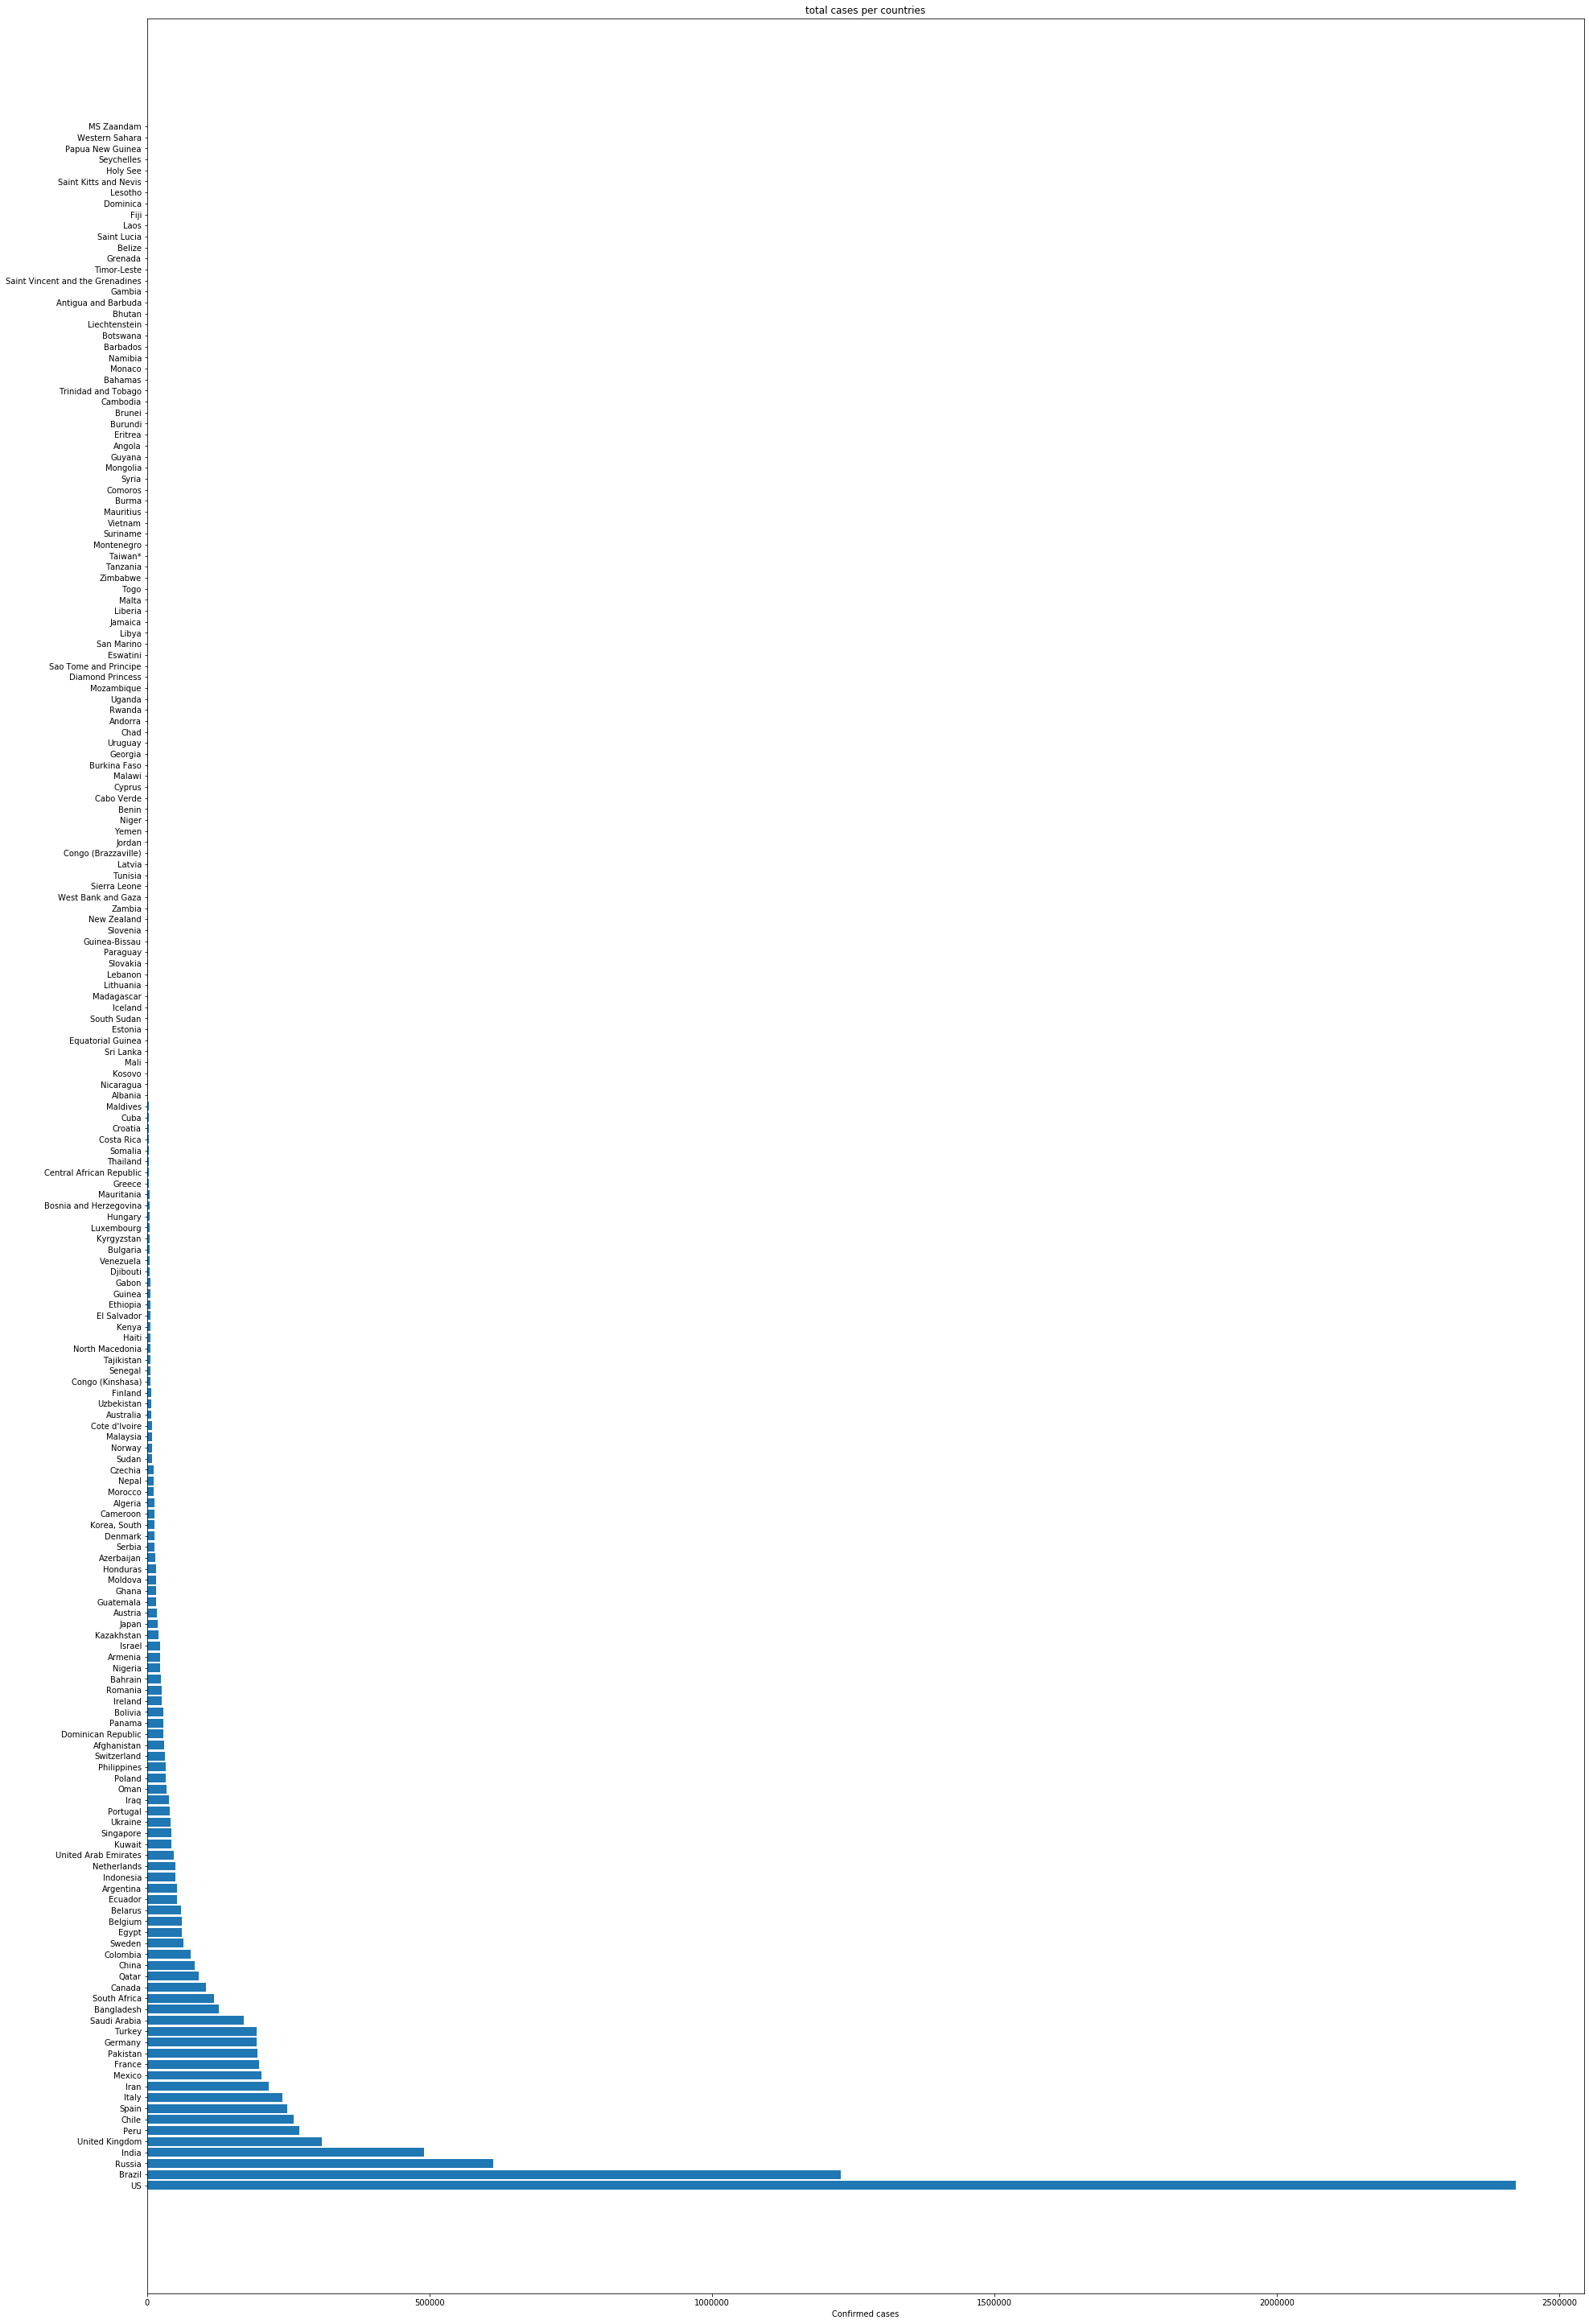

In [39]:
plt.figure(figsize=(32,52))
plt.barh(countries, cases_per_country)
plt.title("total cases per countries")
plt.xlabel("Confirmed cases")
plt.show()

top_ten_country = []
highest_cases = []
top_ten=np.sum(cases_per_country[10:])

for i in range(len(cases_per_country[:10])):
    top_ten_country.append(countries[i])
    highest_cases.append(cases_per_country[i])
              
top_ten_country.append('top_ten')
highest_cases.append(top_ten)

plt.figure(figsize=(32,40))
plt.barh(countries, cases_per_country)
plt.show()

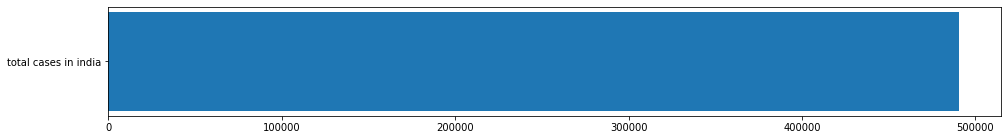

In [40]:
india_cases = latest_confirmed[confirmed_cases['Country/Region']=='India'].sum()
plt.figure(figsize=(16,2))
plt.barh("total cases in india",india_cases)
plt.show()

In [41]:
india_cases

490401

In [42]:
india_append =latest_confirmed[confirmed_cases['Country/Region']=='India']

In [43]:
india_append

131    490401
Name: 6/25/20, dtype: int64

In [44]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/16/20', '6/17/20', '6/18/20', '6/19/20', '6/20/20', '6/21/20',
       '6/22/20', '6/23/20', '6/24/20', '6/25/20'],
      dtype='object', length=156)

In [45]:
dots =india_append.keys()
orld_cases= []
for i in dots:
    indiasum=india_append[i].sum()
    orld_cases.append(indiasum)

In [47]:
india_tested_positive= pd.read_csv('Dataset/time_series_covid19_confirmed_global.csv',index_col ="Country/Region")

rows = india_tested_positive.loc["India"]

In [48]:
print(type(rows))     
rows

<class 'pandas.core.series.Series'>


Province/State       NaN
Lat                   21
Long                  78
1/22/20                0
1/23/20                0
                   ...  
6/21/20           425282
6/22/20           440215
6/23/20           456183
6/24/20           473105
6/25/20           490401
Name: India, Length: 159, dtype: object

In [49]:
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/16/20', '6/17/20', '6/18/20', '6/19/20', '6/20/20', '6/21/20',
       '6/22/20', '6/23/20', '6/24/20', '6/25/20'],
      dtype='object', length=160)

In [50]:
df= pd.DataFrame(rows)
df

,India
Province/State,NaN
Lat,21
Long,78
1/22/20,0
1/23/20,0
...,...
6/21/20,425282
6/22/20,440215
6/23/20,456183
6/24/20,473105


In [51]:
only_indian_cases=df.drop(['Province/State', 'Lat', 'Long'], axis = 0) 

In [52]:
only_indian_cases

,India
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
6/21/20,425282
6/22/20,440215
6/23/20,456183
6/24/20,473105


In [53]:
india_positive_cases= []
for i in dates:
    confirmed_cases_india=only_indian_cases[i].sum()
    india_positive_cases.append(confirmed_cases_india)

KeyError: '1/22/20'

In [54]:
india_positive_cases= []
for i in dates:
    confirmed_cases_india=rows[i].sum()
    india_positive_cases.append(confirmed_cases_india)

In [55]:
india_positive_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

In [56]:
india_positive_cases=np.array(india_positive_cases).reshape(-1,1)

In [57]:
india_positive_cases

array([[     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     1],
       [     1],
       [     1],
       [     2],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     5],
       [     5],
       [    28],
       [    30],
       [    31],
       [    34],
       [    39],
       [    43],
       [    56],
       [    62],
       [    73],
       [    82],
       [   102],
       [   113],
       [   119],
       [   142],
       [   156],
       [   194],
       [   244

In [58]:
first_case_date

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [59]:
X_train, X_test, y_train, y_test = train_test_split(first_case_date, india_positive_cases, test_size=0.30, random_state=42)

In [ ]:
kernel =['poly','sigmoid','rbf']
c = [0.01,0.1,1,10]
gamma = [0.01,0.1,1]
epsilon= [0.01,0.1,1]
shrinking =[True,False]
svm_grid ={'kernel':kernel ,'C': c, 'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}

svm= SVR()
svm_search = RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.6s


In [ ]:
svm_search.best_params_

In [109]:
svm_confirmed = svm_search.best_estimator_
svm_pred =svm_confirmed.predict(future_forecast)

In [110]:
svm_confirmed

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [111]:
svm_pred

array([-1.25967372e+03, -1.25964286e+03, -1.25942682e+03, -1.25884043e+03,
       -1.25769852e+03, -1.25581592e+03, -1.25300744e+03, -1.24908791e+03,
       -1.24387216e+03, -1.23717502e+03, -1.22881130e+03, -1.21859584e+03,
       -1.20634347e+03, -1.19186899e+03, -1.17498725e+03, -1.15551307e+03,
       -1.13326127e+03, -1.10804667e+03, -1.07968412e+03, -1.04798842e+03,
       -1.01277440e+03, -9.73856895e+02, -9.31050725e+02, -8.84170717e+02,
       -8.33031697e+02, -7.77448487e+02, -7.17235915e+02, -6.52208808e+02,
       -5.82181988e+02, -5.06970283e+02, -4.26388518e+02, -3.40251519e+02,
       -2.48374115e+02, -1.50571116e+02, -4.66573677e+01,  6.35523162e+01,
        1.80243103e+02,  3.03600181e+02,  4.33808705e+02,  5.71053865e+02,
        7.15520828e+02,  8.67394767e+02,  1.02686087e+03,  1.19410429e+03,
        1.36931022e+03,  1.55266383e+03,  1.74435029e+03,  1.94455478e+03,
        2.15346245e+03,  2.37125852e+03,  2.59812813e+03,  2.83425647e+03,
        3.07982871e+03,  

MAE: 3107.1708420587147
MSE: 20208554.06243699


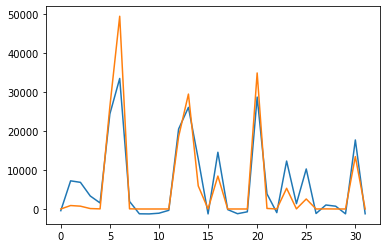

In [112]:
svm_test_pred =svm_confirmed.predict(X_test)
plt.plot(svm_test_pred)
plt.plot(y_test)
print('MAE:', mean_absolute_error(svm_test_pred, y_test))
print('MSE:', mean_squared_error(svm_test_pred,y_test))

In [114]:
adjusted_dates =future_forecast[:-30]

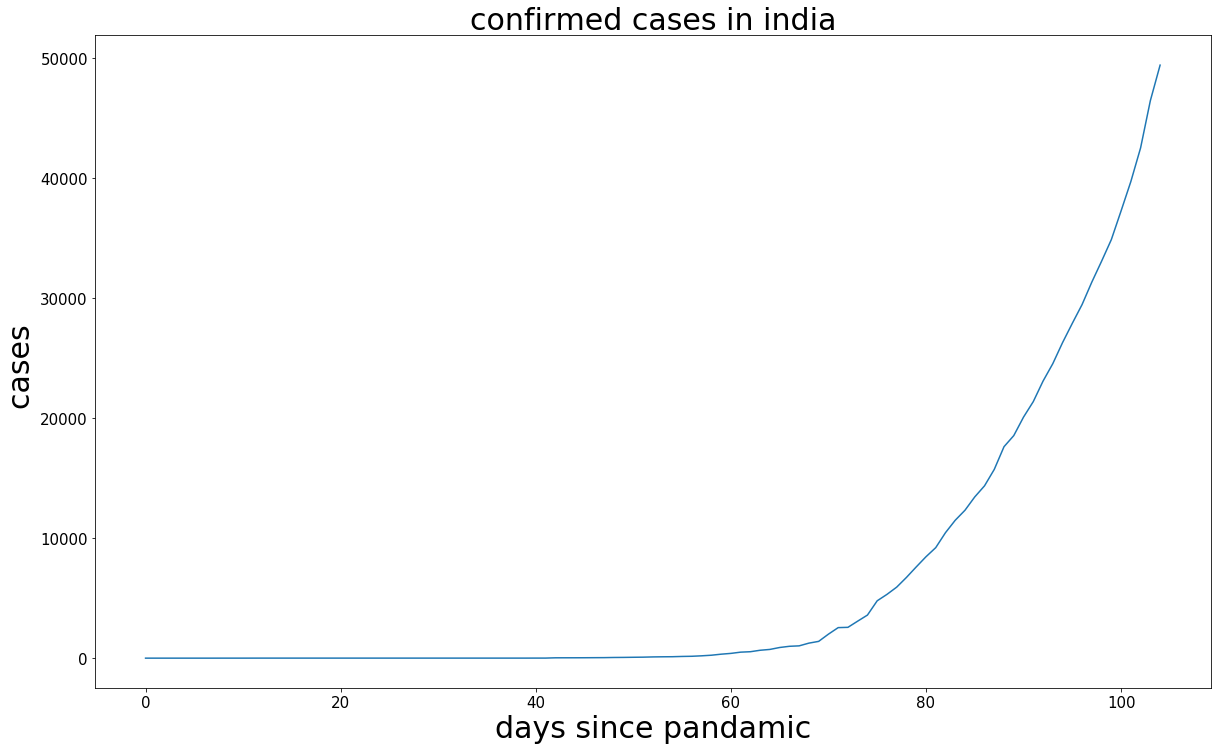

In [115]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, india_positive_cases)
plt.title('confirmed cases in india',size=30)
plt.xlabel('days since pandamic',size=30)
plt.ylabel('cases ', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

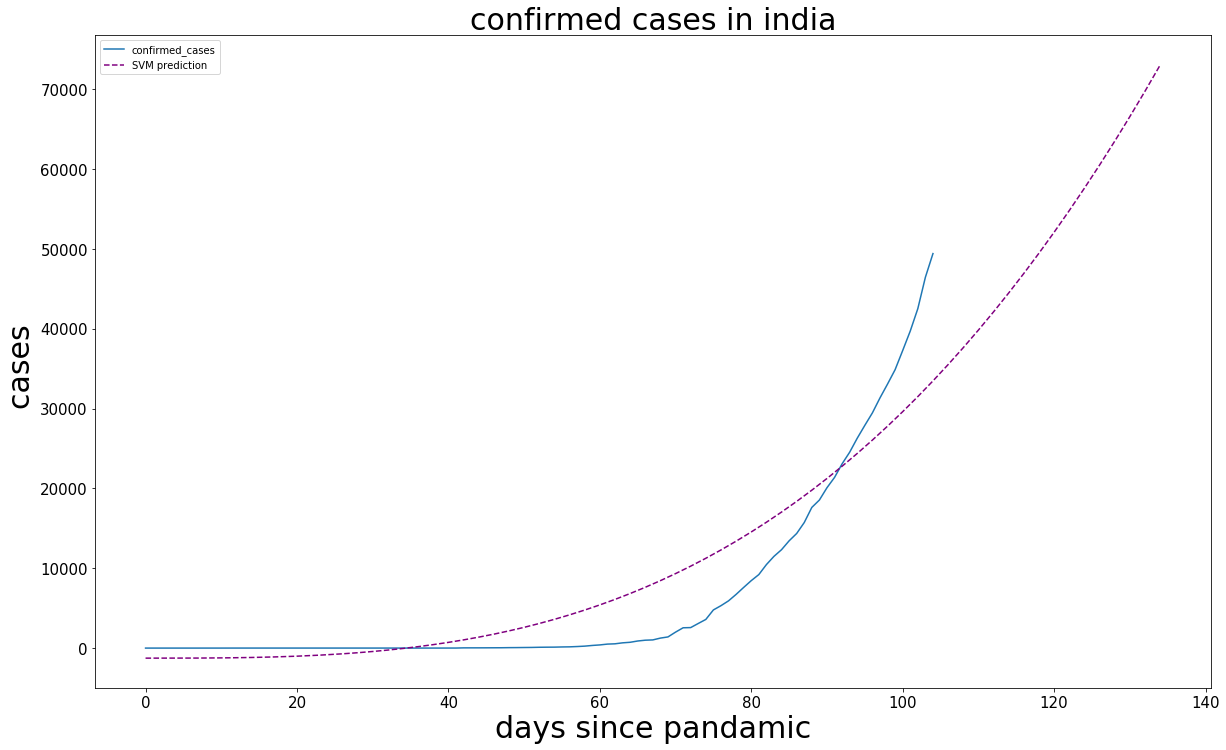

In [116]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, india_positive_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('confirmed cases in india',size=30)
plt.xlabel('days since pandamic',size=30)
plt.ylabel('cases ', size=30)
plt.legend(['confirmed_cases', 'SVM prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [117]:
print('SVM future predictions:')
set(zip(future_forcast_dates[-30:], svm_pred[-30:]))

SVM future predictions:


{('05/06/2020', 34467.42918728958),
 ('05/07/2020', 35497.95598172317),
 ('05/08/2020', 36548.11145352493),
 ('05/09/2020', 37618.08053921829),
 ('05/10/2020', 38708.04848050247),
 ('05/11/2020', 39818.200366488796),
 ('05/12/2020', 40948.72151517044),
 ('05/13/2020', 42099.79698514114),
 ('05/14/2020', 43271.61192654739),
 ('05/15/2020', 44464.35170315872),
 ('05/16/2020', 45678.20140408645),
 ('05/17/2020', 46913.34611844192),
 ('05/18/2020', 48169.971057406765),
 ('05/19/2020', 49448.26127957473),
 ('05/20/2020', 50748.402362338406),
 ('05/21/2020', 52070.57908963333),
 ('05/22/2020', 53414.97670315872),
 ('05/23/2020', 54781.780444613796),
 ('05/24/2020', 56171.17540310989),
 ('05/25/2020', 57583.34700345169),
 ('05/26/2020', 59018.4802126802),
 ('05/27/2020', 60476.76002835403),
 ('05/28/2020', 61958.37205838333),
 ('05/29/2020', 63463.50090359817),
 ('05/30/2020', 64992.33259915481),
 ('05/31/2020', 66545.05162381302),
 ('06/01/2020', 68121.84315823685),
 ('06/02/2020', 69722.892

In [ ]:
-